/Users/constantin/workspace/directlfq/test_data/ptmsite_mapping/shortened_aq.tsv.zip


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,34,42) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


precursor assign finished


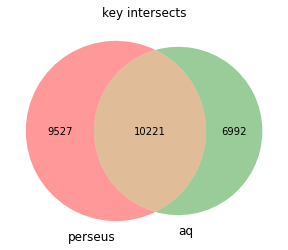

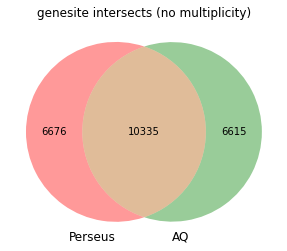

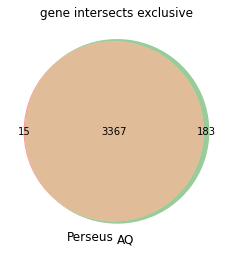

In [ ]:
import pandas as pd
import compare_functions as cf
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

original_input_df = cf.get_shortened_aq_input()
original_input_df["exprec"] = [cf.get_exp_precursor_id(sample, prec) for sample, prec in original_input_df[["R.FileName", "FG.Id"]].itertuples(index=False)]
all_exp_precursors = cf.get_all_expprecs(original_input_df)

perseus_df = cf.load_perseus_df()
keydf_perseus = cf.get_collapse_df(perseus_df)

aq_df = cf.load_aq_df()
keydf_aq = cf.get_collapse_df(aq_df)

key2prec_perseus = cf.get_key2precursors_perseus(perseus_df)
key2expprecursors_perseus = cf.get_key2expprecursors_perseus(perseus_df, key2prec_perseus, all_exp_precursors)

key2expprecursors_aq = cf.get_key2expprecursors_aq(aq_df, all_exp_precursors)

pers_keys = set(key2expprecursors_perseus.keys())
aq_keys = set(key2expprecursors_aq.keys())


venn2([pers_keys, aq_keys], ["perseus", "aq"])
plt.title("key intersects")
plt.show()


perseus_genesites = {x.split("_")[0] + "_" + x.split("_")[1] for x in pers_keys}
aq_genesites = {x.split("_")[0] + "_" + x.split("_")[1] for x in aq_keys}

venn2([perseus_genesites, aq_genesites], ["Perseus","AQ"])
plt.title("genesite intersects (no multiplicity)")
plt.show()


perseus_genes = {x.split("_")[0] for x in pers_keys}
aq_genes = {x.split("_")[0] for x in aq_keys}

venn2([perseus_genes, aq_genes], ["Perseus", "AQ"])
plt.title("gene intersects exclusive")
plt.show()


In [ ]:
display(perseus_df)

,20200529_QX8_MaTa_SA_phosphatase_screen_phospho_repl1_siRNA104,20200529_QX8_MaTa_SA_phosphatase_screen_phospho_repl1_siRNA11,20200529_QX8_MaTa_SA_phosphatase_screen_phospho_repl1_siRNA36,20200529_QX8_MaTa_SA_phosphatase_screen_phospho_repl1_siRNA42,20200529_QX8_MaTa_SA_phosphatase_screen_phospho_repl1_siRNA63,20200712_QX7_MaTa_SA_phosphatase_screen_phospho_repl2_siRNA104,20200712_QX7_MaTa_SA_phosphatase_screen_phospho_repl2_siRNA11,20200712_QX7_MaTa_SA_phosphatase_screen_phospho_repl2_siRNA36,20200712_QX7_MaTa_SA_phosphatase_screen_phospho_repl2_siRNA42,20200712_QX7_MaTa_SA_phosphatase_screen_phospho_repl2_siRNA63,...,EG.PrecursorId,EG.PTMAssayCandidateScore,EG.PTMAssayProbability,EG.PTMLocalizationProbabilities,PTM_0_num,PTM_group,PTM_collapse_key,PTM_collapse_key_num,PTM_0_aa,pseudo_collapse_key
1,242663.5,158835.96875,154310.546875,166110.140625,97117.859375,248957.78125,188163.328125,205570.140625,249144.921875,185627.59375,...,_FS[Phospho (STY)]PVLGR_.2,NaN,1.0,_FS[Phospho (STY): 100%]PVLGR_,1,_FS[Phospho (STY)]PVLGR_.2,AAAS_S371_M1,1,S,AAAS_371_1
2,155578.953125,NaN,NaN,NaN,NaN,NaN,33741.28515625,NaN,NaN,NaN,...,_AQEPPAGGGGSIHDLPLFTETS[Phospho (STY)]PTSAPWDP...,41.155189514160206;30.980897903442397;18.67081...,0.362661868333817;0.347786009311676;3.96635767...,_AQEPPAGGGGS[Phospho (STY): 0%]IHDLPLFT[Phosph...,2,_AQEPPAGGGGSIHDLPLFTETS[Phospho (STY)]PTSAPWDP...,AAAS_S398_M2,2,S,AAAS_398_2
3,269791.53125,93546.0625,NaN,201163.859375,150875.71875,71867.28125,NaN,157880.375,NaN,53638.421875,...,_AQEPPAGGGGSIHDLPLFTETSPTSAPWDPLPGPPPVLPHSPHS[...,1.0;15.3759450912476;13.0262355804443;13.80562...,0.0131444595754147;0.900587618350983;0.0851494...,_AQEPPAGGGGS[Phospho (STY): 1.3%]IHDLPLFT[Phos...,1,_AQEPPAGGGGSIHDLPLFTETSPTSAPWDPLPGPPPVLPHS[Pho...,AAAS_S417_M1,2,S,AAAS_417_1
4,557395.25,NaN,NaN,NaN,NaN,NaN,154880.75,NaN,NaN,291036.15625,...,_AQEPPAGGGGSIHDLPLFTETS[Phospho (STY)]PTSAPWDP...,22.8481788635254;32.8341903686523;40.477664947...,0.273815035820007;5.09776909893844e-05;0.17463...,_AQEPPAGGGGS[Phospho (STY): 0%]IHDLPLFT[Phosph...,2,_AQEPPAGGGGSIHDLPLFTETSPT[Phospho (STY)]SAPWDP...,AAAS_S417_M2,4,S,AAAS_417_2
5,NaN,NaN,NaN,NaN,NaN,NaN,60438.4921875,NaN,NaN,113569.875,...,_AQEPPAGGGGSIHDLPLFT[Phospho (STY)]ETSPTSAPWDP...,31.4600563049316;30.722421646118196;27.1631031...,0.454833388328552;0.231417551636696;0.05029184...,_AQEPPAGGGGS[Phospho (STY): 0%]IHDLPLFT[Phosph...,2,_AQEPPAGGGGSIHDLPLFT[Phospho (STY)]ETSPTSAPWDP...,AAAS_T395_M2,1,T,AAAS_395_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,NaN,355520,117270,NaN,NaN,NaN,NaN,163996,NaN,NaN,...,_T[Phospho (STY)]SSVVEEHFQAS[Phospho (STY)]VSP...,15.4809398651123;22.7251892089844;26.835163116...,2.55473162529072e-15;3.46667424254034e-18;4.49...,_T[Phospho (STY): 0%]S[Phospho (STY): 0%]S[Pho...,2,_TSSVVEEHFQASVSPT[Phospho (STY)]EAAPPAT[Phosph...,ZZEF1_T1477_M2,2,T,ZZEF1_1477_2
19761,NaN,NaN,53791.2,NaN,NaN,NaN,NaN,68811.8,NaN,59682.9,...,_T[Phospho (STY)]SSVVEEHFQASVSPTEAAPPATGDQSPGL...,1.0;9.00769805908203;10.708778381347699,4.6328985092714006e-08;2.11803558158863e-06;6....,_T[Phospho (STY): 0%]S[Phospho (STY): 0%]S[Pho...,1,_TSSVVEEHFQASVSPTEAAPPAT[Phospho (STY)]GDQSPGL...,ZZEF1_T1484_M1,1,T,ZZEF1_1484_1
19762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163513,NaN,...,_T[Phospho (STY)]SSVVEEHFQAS[Phospho (STY)]VSP...,15.4809398651123;22.7251892089844;26.835163116...,2.55473162529072e-15;3.46667424254034e-18;4.49...,_T[Phospho (STY): 0%]S[Phospho (STY): 0%]S[Pho...,2,_TSSVVEEHFQASVSPT[Phospho (STY)]EAAPPAT[Phosph...,ZZEF1_T1484_M2,1,T,ZZEF1_1484_2
19763,293312,209838,NaN,205528,125206,NaN,NaN,NaN,NaN,NaN,...,_T[Phospho (STY)]SSVVEEHFQASVSPTEAAPPATGDQSPGL...,1.0,9.23603965929942e-06;0.0245303921401501;0.0877...,_T[Phospho (STY): 0%]S[Phospho (STY): 0%]S[Pho...,1,_TSSVVEEHFQASVSPTEAAPPATGDQSPGLGT[Phospho (STY...,ZZEF1_T1493_M1,2,T,ZZEF1_1493_1


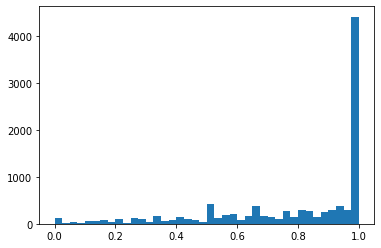

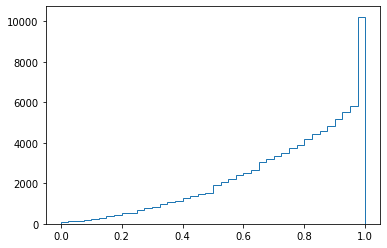

In [ ]:
#check precursor overlaps on matching keys
import matplotlib.pyplot as plt
import numpy as np
intersect_keys = np.array(list(pers_keys.intersection(aq_keys)))
ionvec_pers = [set(key2expprecursors_perseus.get(x)) for x in intersect_keys]
ionvec_aq = [set(key2expprecursors_aq.get(x)) for x in intersect_keys]

fraction_overlaps = np.array([len(pers_ions.intersection(aq_ions))/len(pers_ions.union(aq_ions)) for pers_ions, aq_ions in zip(ionvec_pers, ionvec_aq)])

plt.hist(fraction_overlaps, bins=40)
plt.show()
plt.hist(fraction_overlaps, bins = 40, cumulative = True, histtype='step')
plt.show()

zero_overlap_idxs = np.where(fraction_overlaps==0)[0]
total_overlap_idxs = np.where(fraction_overlaps==1)[0]
zero_overlap_keys = intersect_keys[zero_overlap_idxs]
total_overlap_keys = intersect_keys[total_overlap_idxs]

# print(total_overlap_keys)
#print(zero_overlap_keys)

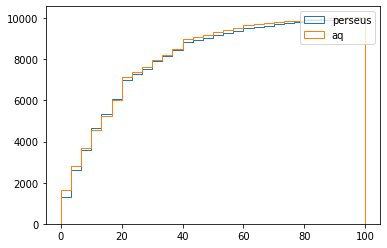

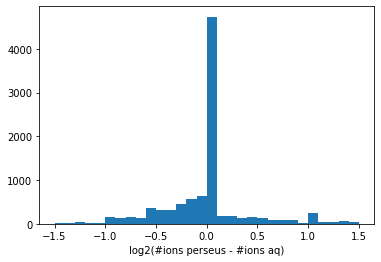

perseus larger: 2367  aq larger: 3347  equal size: 4507


In [ ]:
# check numbers of precursors per key
precs_per_key_pers = np.array([len(pers_ions) for pers_ions in ionvec_pers])
precs_per_key_aq = np.array([len(aq_ions) for aq_ions in ionvec_aq])


plt.hist(precs_per_key_pers, bins=30, range = [0, 100],cumulative=True,label= "perseus", histtype = "step")
plt.hist(precs_per_key_aq, bins = 30, range = [0, 100],cumulative=True,label = "aq",histtype='step')

plt.legend()
plt.show()

relative_ratios = np.array([np.log2(len(pers_ions)/len(aq_ions)) for pers_ions, aq_ions in zip(ionvec_pers, ionvec_aq)])

plt.hist(relative_ratios, bins = 30, range = [-1.5, 1.5], cumulative=False )
plt.xlabel("log2(#ions perseus - #ions aq)")
plt.show()
print(f"perseus larger: {sum(relative_ratios>0)}  aq larger: {sum(relative_ratios<0)}  equal size: {sum(relative_ratios==0)}")



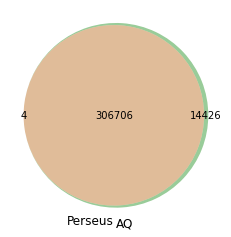

In [ ]:
#compare number of expprecs in both datasets
from matplotlib_venn import venn2
expprecs_pers = [set(x) for x in key2expprecursors_perseus.values()]
expprecs_aq = [set(x) for x in key2expprecursors_aq.values()]

expprecs_pers = set().union(*expprecs_pers)
expprecs_aq = set().union(*expprecs_aq)

venn2([expprecs_pers, expprecs_aq], ["Perseus", "AQ"])

#display(expprecs_pers.difference(expprecs_aq))

#in the exclusive Perseus set, the protein ID could not be mapped 

In [ ]:
import compare_functions as cf
import numpy as np


samplemap = cf.get_samplemap()
sample2cond = dict(zip(samplemap["sample"], samplemap["condition"]))
#original_input_df["cond"]
condvec = [sample2cond.get(f"{sample}.htrms") for sample in original_input_df["R.FileName"]]
original_input_df["cond"] = condvec

replicate_df = original_input_df[["FG.Id", "cond", 'EG.PTMProbabilities [Phospho (STY)]']]
replicate_df = replicate_df.set_index(["cond", "FG.Id"]).sort_index()

collected_probs = []
collected_badprobs = []
num_total = len(replicate_df.index.unique())
count = 0
count_bads = 0
count_all = 0
for condpep in replicate_df.index.unique():
    if count%100==0:
        print(f"{count} of {num_total}")
    count+=1
    probs = replicate_df.loc[condpep].to_numpy()
    if type(probs[0][0]) != type("String"):
        continue
    probs = [np.array(x[0].split(";")).astype("float") for x in probs]
    num_sites = round(np.sum(probs[0]))
    summed_probs = np.sum([x for x in probs], axis = 0)
    minprobs = np.min([x for x in probs], axis = 0)
    idxs_most_likely = np.argpartition(summed_probs, -num_sites)[-num_sites:]
    for idx in idxs_most_likely:
        collected_probs.extend([x[idx] for x in probs])
        count_all+=1
        if minprobs[idx]< 0.3:
            collected_badprobs.extend([x[idx] for x in probs])
            count_bads+=1


0 of 128515
100 of 128515
200 of 128515
300 of 128515
400 of 128515
500 of 128515
600 of 128515
700 of 128515
800 of 128515
900 of 128515
1000 of 128515
1100 of 128515
1200 of 128515
1300 of 128515
1400 of 128515
1500 of 128515
1600 of 128515
1700 of 128515
1800 of 128515
1900 of 128515
2000 of 128515
2100 of 128515
2200 of 128515
2300 of 128515
2400 of 128515
2500 of 128515
2600 of 128515
2700 of 128515
2800 of 128515
2900 of 128515
3000 of 128515
3100 of 128515
3200 of 128515
3300 of 128515
3400 of 128515
3500 of 128515
3600 of 128515
3700 of 128515
3800 of 128515
3900 of 128515
4000 of 128515
4100 of 128515
4200 of 128515
4300 of 128515
4400 of 128515
4500 of 128515
4600 of 128515
4700 of 128515
4800 of 128515
4900 of 128515
5000 of 128515
5100 of 128515
5200 of 128515
5300 of 128515
5400 of 128515
5500 of 128515
5600 of 128515
5700 of 128515
5800 of 128515
5900 of 128515
6000 of 128515
6100 of 128515
6200 of 128515
6300 of 128515
6400 of 128515
6500 of 128515
6600 of 128515
6700 of

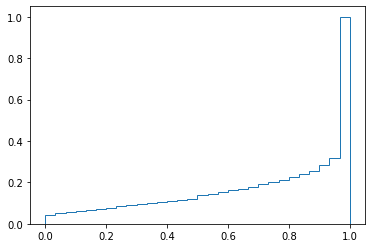

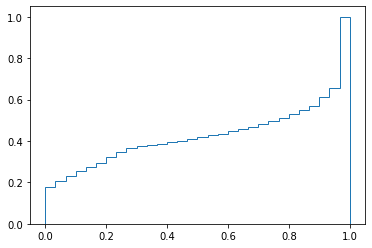

29357 bad of 143854


In [ ]:
import matplotlib.pyplot as plt

plt.hist(collected_probs, bins = 30, histtype='step',density=True, cumulative = True)
plt.show()

plt.hist(collected_badprobs, bins = 30, histtype='step',density=True, cumulative = True)
plt.show()
print(f"{count_bads} bad of {count_all}")